## 1. Importing Libraries

In [1]:
import re

import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing and Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defining the plot style
sns.set_style("whitegrid")

## 2. Reading dataset

In [2]:
df_car = pd.read_csv("data/car data.csv")

display(df_car.head())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Note:**

* Here `Selling_Price` is the target variable
* The price is in lacs, say Rs. 3.35 lacs

## 3. Dataset description

In [3]:
# Number of rows and columns
display(df_car.shape)

(301, 9)

In [4]:
# Checking data type of the columns
display(df_car.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
# Null values by columns
df_car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Observations:**

* The data type of the columns seems fine
* There are no missing values in the data

## 4. Data Cleaning

In [6]:
def rename_columns(columns: list):
    columns = ['_'.join(re.sub('[.-]', '_', col).strip().lower().split()) for col in columns]
    
    return columns

In [7]:
df_car.columns = rename_columns(columns=df_car.columns)

In [8]:
df_car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 5. EDA

### a. Cardinality of the columns

In [9]:
def unique_value_count(df: pd.DataFrame):
    df_nunique = df.nunique().reset_index()
    df_nunique["dtype"] = df.dtypes.reset_index().loc[:, 0]
    df_nunique.columns = ["column", "nunique", "dtype"]
    
    display(df_nunique)

In [10]:
unique_value_count(df=df_car)

,column,nunique,dtype
0,car_name,98,object
1,year,16,int64
2,selling_price,156,float64
3,present_price,147,float64
4,kms_driven,206,int64
5,fuel_type,3,object
6,seller_type,2,object
7,transmission,2,object
8,owner,3,int64


### b. Summary statistics of the numeric features

In [11]:
display(df_car.describe())

,year,selling_price,present_price,kms_driven,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### c. Distribution of numeric values

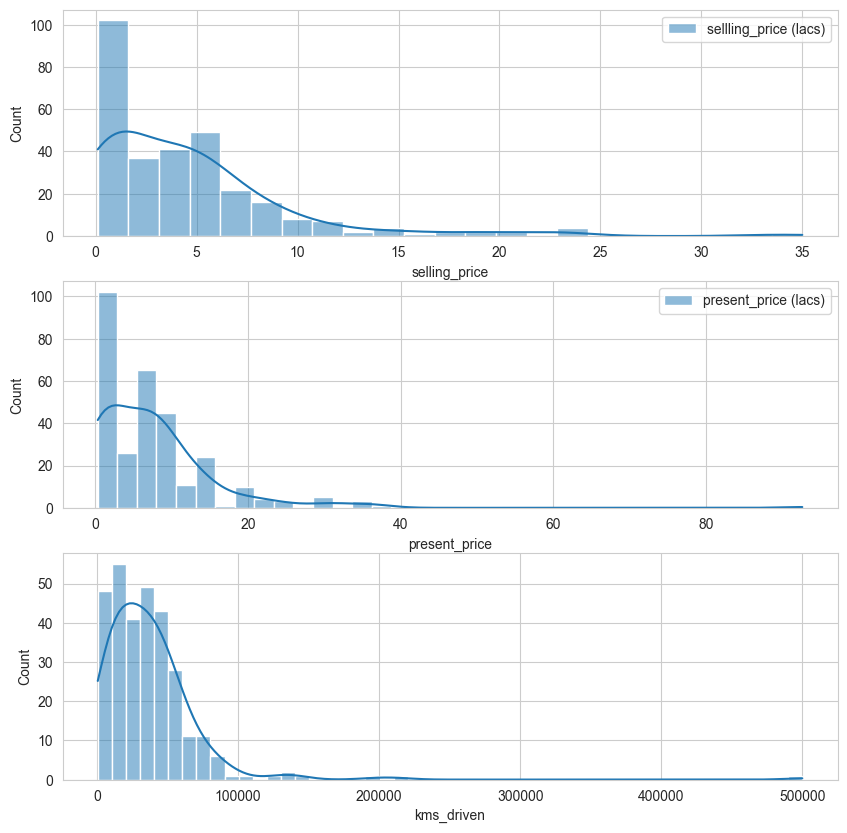

In [12]:
# Observing the distribution of numeric columns
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.histplot(x="selling_price", data=df_car, kde=True, label="sellling_price (lacs)")
plt.legend()

plt.subplot(3, 1, 2)
sns.histplot(x="present_price", data=df_car, kde=True, label="present_price (lacs)")
plt.legend()

plt.subplot(3, 1, 3)
sns.histplot(x="kms_driven", data=df_car, kde=True)

plt.show()

**Observations:**

* All the distributions are right-skewed
* It's interesting to see that we have more vehicles having present_price lying in 0-2 lacs
* Looks like we also have two wheelers in the dataset

In [13]:
display(df_car.query("present_price < 2").head())

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0


### d. Bar plots showing count of different categories by columns

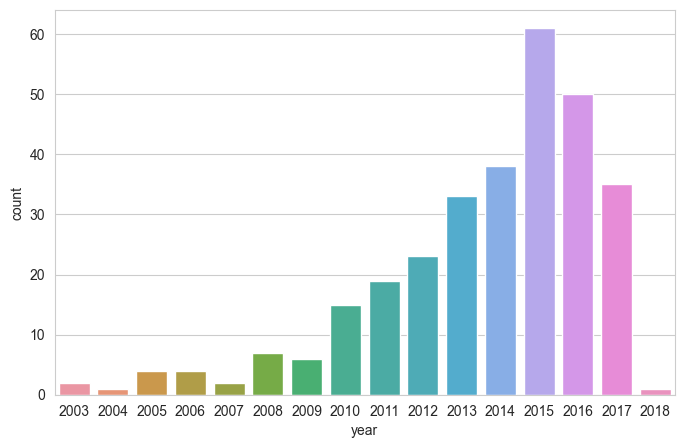

In [14]:
plt.figure(figsize=(8, 5))

sns.countplot(x="year", data=df_car)
plt.show()

**Observation:** The cars available in the dataset are mostly purchased between 2014-2017

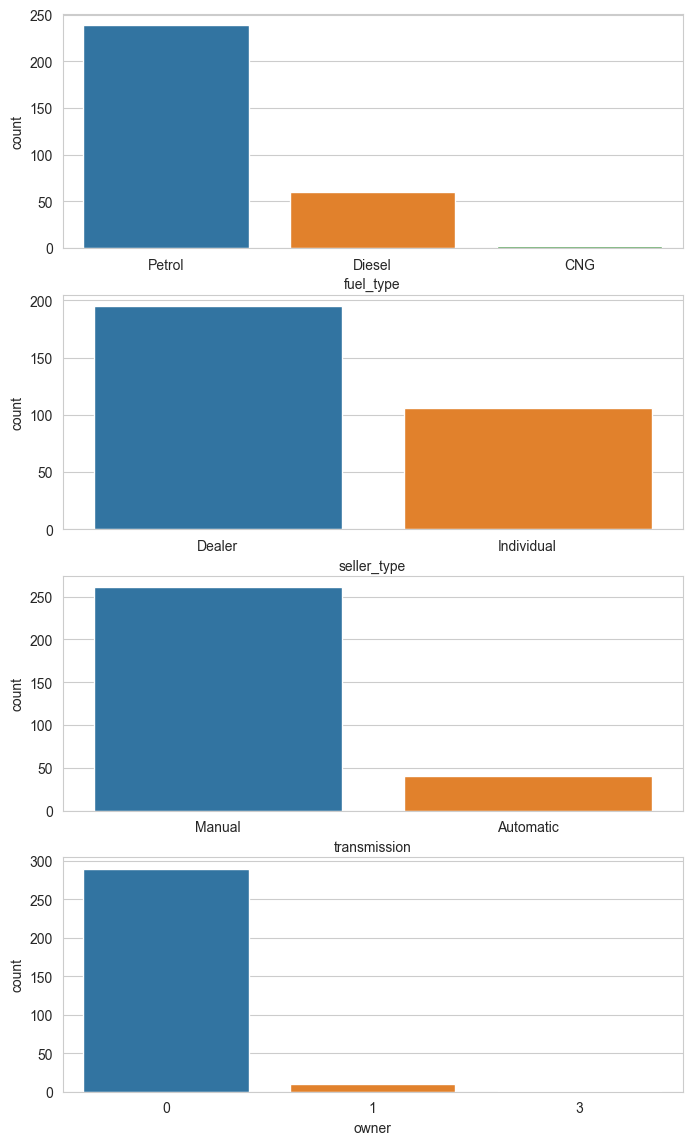

In [15]:
plt.figure(figsize=(8, 14))

plt.subplot(4, 1, 1)
sns.countplot(x="fuel_type", data=df_car)

plt.subplot(4, 1, 2)
sns.countplot(x="seller_type", data=df_car)

plt.subplot(4, 1, 3)
sns.countplot(x="transmission", data=df_car)

plt.subplot(4, 1, 4)
sns.countplot(x="owner", data=df_car)

plt.show()

### e. Inspecting correlation between variables

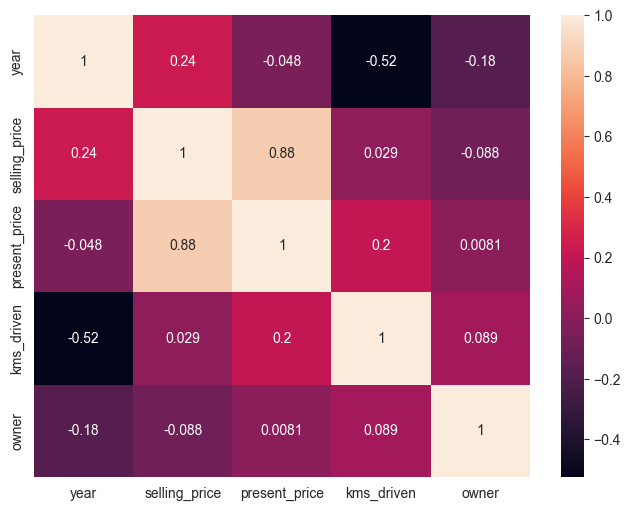

In [16]:
plt.figure(figsize=(8, 6))

sns.heatmap(df_car.corr(numeric_only=True), annot=True)
plt.show()

**Observation:** The `present_price` is highly correlated with `selling_price` and it is obvious.

### e. Checking Multicollinearity

In [17]:
# Applying one hot encoding
fuel_type_ohe = pd.get_dummies(df_car["fuel_type"], dtype=int, drop_first=True)
transmission_ohe = pd.get_dummies(df_car["transmission"], dtype=int, drop_first=True)

fuel_type_ohe_cols = fuel_type_ohe.columns.tolist()
transmission_ohe_cols = transmission_ohe.columns.tolist()

In [18]:
df_car = df_car \
         .join(fuel_type_ohe, how="inner") \
         .join(transmission_ohe, how="inner")

display(df_car.head())

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,Diesel,Petrol,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1


In [19]:
numeric_cols = ["present_price", "kms_driven"]

explanatory_vrbls_df = df_car[numeric_cols]

In [20]:
vif_df = pd.DataFrame()
vif_df["feature"] = explanatory_vrbls_df.columns

# Calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(explanatory_vrbls_df.values, i) for i in range(len(explanatory_vrbls_df.columns))]

In [21]:
display(vif_df)

,feature,VIF
0,present_price,1.474103
1,kms_driven,1.474103


## 6. Data Preprocessing

In [22]:
ohe_cols = fuel_type_ohe_cols + transmission_ohe_cols

explanatory_vrbls_list = numeric_cols + ohe_cols

X = df_car.loc[:, explanatory_vrbls_list].values
y = df_car.loc[:, "selling_price"].values

In [23]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [24]:
# Applying Standard Scaling on numeric columns
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train[:, :5])
X_test_scaled = sc.transform(X_test[:, :5])

In [25]:
# Concatenating scaled and ohe features
X_train = np.concatenate([X_train_scaled, X_train[:, 5:]], axis=1)
X_test = np.concatenate([X_test_scaled, X_test[:, 5:]], axis=1)

## 7. Model Training

In [26]:
# Initializing the models
lin_reg = LinearRegression()
dec_tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [27]:
# Fitting Linear Regression
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
# Fitting Decision Tree
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
# Fitting Random Forest
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

## 8. Model Evaluation

In [30]:
r2_score_lambda = lambda y_true, y_pred: np.round(r2_score(y_true, y_pred), 6)
mae_lambda = lambda y_true, y_pred: np.round(mean_absolute_error(y_true, y_pred), 6)
rmse_lambda = lambda y_true, y_pred: np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 6)

In [31]:
df_model_metrics = pd.DataFrame({
    "model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "train_r2": [
        r2_score_lambda(y_true=y_train, y_pred=lin_reg.predict(X_train)),
        r2_score_lambda(y_true=y_train, y_pred=dec_tree_reg.predict(X_train)),
        r2_score_lambda(y_true=y_train, y_pred=rf_reg.predict(X_train)),
    ],
    "test_r2": [
        r2_score_lambda(y_true=y_test, y_pred=lin_reg.predict(X_test)),
        r2_score_lambda(y_true=y_test, y_pred=dec_tree_reg.predict(X_test)),
        r2_score_lambda(y_true=y_test, y_pred=rf_reg.predict(X_test)),
    ],
    "train_mae" : [
        mae_lambda(y_true=y_train, y_pred=lin_reg.predict(X_train)),
        mae_lambda(y_true=y_train, y_pred=dec_tree_reg.predict(X_train)),
        mae_lambda(y_true=y_train, y_pred=rf_reg.predict(X_train)),
    ],
    "test_mae": [
        mae_lambda(y_true=y_test, y_pred=lin_reg.predict(X_test)),
        mae_lambda(y_true=y_test, y_pred=dec_tree_reg.predict(X_test)),
        mae_lambda(y_true=y_test, y_pred=rf_reg.predict(X_test)),
    ],
    "train_rmse": [
        rmse_lambda(y_true=y_train, y_pred=lin_reg.predict(X_train)),
        rmse_lambda(y_true=y_train, y_pred=dec_tree_reg.predict(X_train)),
        rmse_lambda(y_true=y_train, y_pred=rf_reg.predict(X_train)),
    ],
    "test_rmse": [
        rmse_lambda(y_true=y_test, y_pred=lin_reg.predict(X_test)),
        rmse_lambda(y_true=y_test, y_pred=dec_tree_reg.predict(X_test)),
        rmse_lambda(y_true=y_test, y_pred=rf_reg.predict(X_test)),
    ]
})

In [32]:
display(df_model_metrics)

,model,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,Linear Regression,0.834711,0.820882,1.395497,1.485586,2.039798,2.240068
1,Decision Tree,0.999826,0.832376,0.006042,1.068361,0.066183,2.167000
2,Random Forest,0.978433,0.893015,0.354909,0.730326,0.736820,1.731218


### Observations:

* Goodness of fit (r2-score)
  * Decision Tree and Random Forest models are overfitting
  * While Linear Regression is generalizing well

* Similar behavior can be observed on MAE and RMSE

## Conclusion:

I'll be going ahead with Linear Regression since it generalized well and the explainability is high